# Zanieczyszczenie powietrza: przykład zastosowania diagnostyki regresji liniowej statsmodels

In [1]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd


In [2]:
import pandas as pd
df = pd.read_csv('c:/TF/AirQ_filled.csv')
df.head(3)

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502


#### <span style="color:blue">Sprawdzam kompletność danych i ich format</span>

In [3]:
df.dtypes

Unnamed: 0         int64
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [4]:
df.isnull().sum()

Unnamed: 0       0
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

#### <span style="color:blue">Sprawdzam kompletność danych i ich format</span>

In [5]:
CORREL = df.corr().sort_values('PT08.S4(NO2)')
CORREL['PT08.S4(NO2)']

PT08.S3(NOx)    -0.535264
Unnamed: 0      -0.526513
RH              -0.015158
NO2(GT)          0.183445
NOx(GT)          0.238894
T                0.558374
PT08.S5(O3)      0.579192
AH               0.630272
CO(GT)           0.631854
PT08.S1(CO)      0.676413
C6H6(GT)         0.756328
PT08.S2(NMHC)    0.769786
PT08.S4(NO2)     1.000000
Name: PT08.S4(NO2), dtype: float64

In [6]:
CORREL

,Unnamed: 0,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S3(NOx),-0.262694,-0.715683,-0.777913,-0.737702,-0.798121,-0.647600,1.000000,-0.648047,-0.535264,-0.795958,-0.132851,-0.060581,-0.216738
Unnamed: 0,1.000000,0.042099,0.010293,-0.053288,-0.073933,0.424852,-0.262694,0.352153,-0.526513,0.117657,-0.464294,0.202567,-0.328732
RH,0.202567,0.020122,0.120042,-0.054949,-0.082087,0.174825,-0.060581,-0.086009,-0.015158,0.137821,-0.570775,1.000000,0.180512
NO2(GT),0.352153,0.682774,0.655691,0.624668,0.651559,0.729830,-0.648047,1.000000,0.183445,0.715340,-0.183268,-0.086009,-0.310988
NOx(GT),0.424852,0.773677,0.705739,0.703081,0.690637,1.000000,-0.647600,0.729830,0.238894,0.762301,-0.253366,0.174825,-0.158192
T,-0.464294,0.025639,0.037046,0.189645,0.231083,-0.253366,-0.132851,-0.183268,0.558374,-0.044829,1.000000,-0.570775,0.654768
PT08.S5(O3),0.117657,0.858762,0.901460,0.861688,0.876588,0.762301,-0.795958,0.715340,0.579192,1.000000,-0.044829,0.137821,0.055483
AH,-0.328732,0.025227,0.121724,0.155825,0.174921,-0.158192,-0.216738,-0.310988,0.630272,0.055483,0.654768,0.180512,1.000000
CO(GT),0.042099,1.000000,0.886114,0.932584,0.918386,0.773677,-0.715683,0.682774,0.631854,0.858762,0.025639,0.020122,0.025227
PT08.S1(CO),0.010293,0.886114,1.000000,0.886325,0.896015,0.705739,-0.777913,0.655691,0.676413,0.901460,0.037046,0.120042,0.121724


Stawiam Hipotezę badawczą
-	H0 nie istnieje statystycznie istotna pomiędzy wzrostem zanieczyszczenia związkiem PT08.S4(NO2) a temperaturą i ciśnieniem atmosferycznym
-	H1 istnieje statystycznie istotna korelacja pomiędzy wzrostem zanieczyszczenia związkiem PT08.S4(NO2) a temperaturą i ciśnieniem atmosferycznym


### <span style="color:blue">Sprawdzam korelację</span>
Ponieważ mam dane ciągłe sprawdzę korelację za pomocą współczynnika persona.

In [7]:
import scipy

print("\nAssociation between PT08.S4(NO2) and temperature: ")
PKP = scipy.stats.pearsonr(df['PT08.S4(NO2)'], df['T'])
PKP = np.round(PKP, decimals=4)
print(PKP)


Association between PT08.S4(NO2) and temperature: 
[0.5584 0.    ]


In [8]:
print("\nAssociation between PT08.S4(NO2) and atmospheric pressure: ")
PKP = scipy.stats.pearsonr(df['PT08.S4(NO2)'], df['AH'])
PKP = np.round(PKP, decimals=4)
print(PKP)


Association between PT08.S4(NO2) and atmospheric pressure: 
[0.6303 0.    ]


W obu przypadkach wysoka statystyczne korelacja (p<0.01) z zanieczyszczeniem PT08.S4(NO2). Znając prognozę pogody (przyszłą temperaturę i ciśnienie atmosferyczne) możemy przewidzieć poziom zanieczyszczenia związkami PT08.S4(NO2). Obliczam r2 dla prognozowania na podstawie korelacji temperaturą i na podstawie korelacji z ciśnieniem atmosferycznym.

In [9]:
print("Przewidywalność zmienności PT08.S4(NO2) na podstawie temperatury: ", 0.5584*0.5584)

Przewidywalność zmienności PT08.S4(NO2) na podstawie temperatury:  0.31181056


In [10]:
print("Przewidywalność zmienności PT08.S4(NO2) na podstawie ciśnienia atmosferycznego: ", 0.6303*0.6303)

Przewidywalność zmienności PT08.S4(NO2) na podstawie ciśnienia atmosferycznego:  0.39727809


 
### <span style="color:blue">Tworzymy model regresji liniowej</span>

In [11]:
X = df[['AH','T']]
y = df['PT08.S4(NO2)']

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3592.
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:33:34   Log-Likelihood:                -65354.
No. Observations:                9357   AIC:                         1.307e+05
Df Residuals:                    9354   BIC:                         1.307e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        864.5223      7.468    115.767      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
dfM = pd.concat([X, y], axis=1)

### <span style="color:blue">Residuals vs Fitted plot</span>
Odpowiada na pytanie czy model liniowy dobrze odzwierciedla zmienność procesu.

In [13]:
# model values
model_y = model_fit.fittedvalues

In [14]:
plt.style.use('seaborn')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

Text(0, 0.5, 'Residuals')

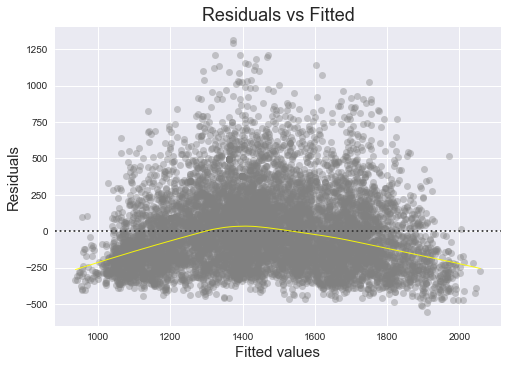

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import seaborn as sns

pl_A = plt.figure()
pl_A.axes[0] = sns.residplot(model_y, dfM.columns[-1], data=dfM,
                          lowess=True,
                          scatter_kws={'color': 'grey','alpha': 0.4},
                          line_kws={'color': 'yellow', 'lw': 1, 'alpha': 0.9})

pl_A.axes[0].set_title('Residuals vs Fitted')
pl_A.axes[0].set_xlabel('Fitted values')
pl_A.axes[0].set_ylabel('Residuals')

Jednym z założeń modelu OLS jest umiejętność opisu przebiegu danych przy użyciu linii prostej. Jeśli to założenie jest prawdziwe, powinniśmy mieć stosunkowo płaską linię, patrząc na wartości rezydualne względem dopasowanych punktów (żółta linia). Idealny wykres rozproszenia Residuals vs Fitted, gdy nie ma widocznych wzorów, a żółta linia będzie prosta i pozioma (losowy szum).
Linia w kształcie łuku pokazuje, że model nie uchwycił niektórych elementów nieliniowych. Te nieliniowe cechy nie pasowały do modelu. Być może zmienność danych można lepiej uchwycić przy użyciu modelu wykładniczego lub innej nieliniowej transformacji uzyskanej przy użyciu zmiennych syntetycznych.


### <span style="color:blue">Normal Q-Q Plot</span>

If the red points are on a straight line, it means that the standarized residuals has a normal distribution.

In [16]:
model_residuals = model_fit.resid
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

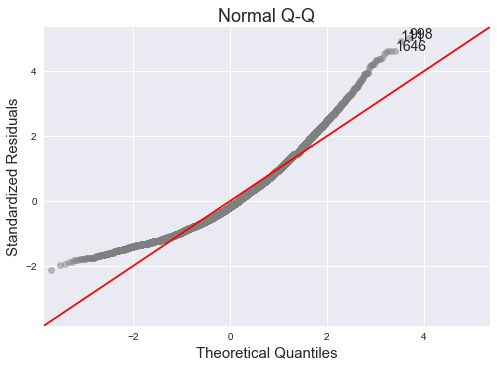

In [17]:
QQ = ProbPlot(model_norm_residuals)
pl_B = QQ.qqplot(line='45', alpha=0.5, color='grey', lw=1)
pl_B.axes[0].set_title('Normal Q-Q')
pl_B.axes[0].set_xlabel('Theoretical Quantiles')
pl_B.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    pl_B.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

Lokalizacja punktów wskazuje że standaryzowane wartości rezydualne modelu (standaryzowane reszty modelu) nie mają doskonałego rozkładu normalnego. Jeśli punkty nie znajdują się na czerwonej linii - jest daleko od czerwonej linii - oznacza to, że standaryzowane reszty nie są normalnie rozmieszczone (model ma „ciężkie ogony”).
Jeśli standaryzowane reszty nie mają rozkładu normalnego, model może generować ekstremalne wyniki.

#### Sprawdźmy, które dane obciążają rozkład normalny

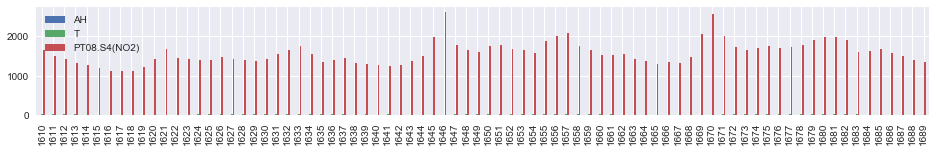

In [18]:
dfM.iloc[1610:1690, :].plot(kind='bar',figsize=(16,2))

Wyraźnie widać, obserwacja 1646, którą wskazał wykres Normal Q-Q Plot, istotnie odstaje od pozostałych danych. Chcąc poprawić jakość modelu regresji należy wyrzucić z danych wartości odstające.

### <span style="color:blue">Scale-Location plot</span>

Wykres sprawdza niespójność wariancji lub heteroscedastyczności. Zgodnie z zasadą homoscedastyczności, każdy rozkład prawdopodobieństwa dla y (zmienna wynikowa) ma to samo odchylenie standardowe, niezależnie od wartości x (predyktor).

In [19]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
model_abs_resid = np.abs(model_residuals)

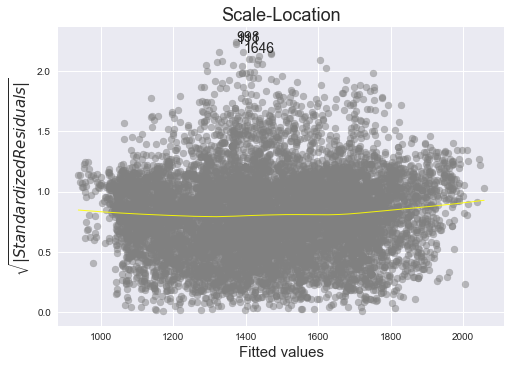

In [20]:
pl_F = plt.figure()
plt.scatter(model_y, model_norm_residuals_abs_sqrt, color='grey', alpha=0.5);
sns.regplot(model_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'yellow', 'lw': 1, 'alpha': 0.9});
pl_F.axes[0].set_title('Scale-Location')
pl_F.axes[0].set_xlabel('Fitted values')
pl_F.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    pl_F.axes[0].annotate(i,
                                 xy=(model_y[i],
                                     model_norm_residuals_abs_sqrt[i]))

Im bardziej pozioma jest żółta linia, tym bardziej prawdopodobne jest, że dane są homoscedastyczne.
Wykres heteroscedastyczny może mieć kształt litery „V”, co oznacza, że w porównaniu do środkowej części są wyższe wartości po lewej i po prawej stronie wykresu. Może to wynikać z nieujawnienia nieliniowości w modelu i należy to dalej zbadać. Dwie najczęstsze metody „konsolidacji” heteroscedastyczności to:

- użycie metody ważenia metodą najmniejszych kwadratów lub
- użycie heteroscedastycznie skorygowanej macierzy kowariancji (hccm).

Kolejny wykres wskazał obserwacje numer 1646 jako wycinek zaburzający model regresji liniowej.


### <span style="color:blue">Residuals vs Leverage plot</span>

Gdy standaryzowane reszty nie mają rozkładu normalnego, mogą wystąpić ekstremalne wartości wyników y. W przypadku wysokich punktów dźwigni mogą pojawić się skrajnie niezależne zmienne x. Ekstremalne x wydaje się być takie złe, ale może mieć szkodliwy wpływ na model, ponieważ współczynniki przy x lub β są bardzo wrażliwe na punkty dźwigni. Celem wykresu Residuals vs Leverage jest identyfikacja tych problematycznych obserwacji.

In [21]:
model_leverage = model_fit.get_influence().hat_matrix_diag
model_cooks = model_fit.get_influence().cooks_distance[0]

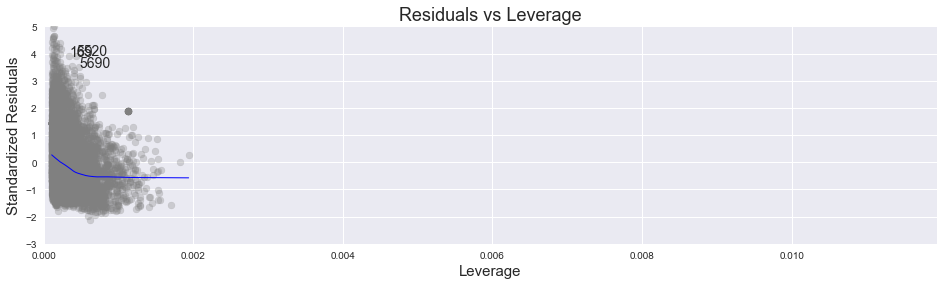

In [22]:

pl_C = plt.figure(figsize=(16,4));
plt.scatter(model_leverage, model_norm_residuals, color='grey', alpha=0.3);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'blue', 'lw': 1, 'alpha': 1.0});
pl_C.axes[0].set_xlim(0, max(model_leverage)+0.01)
pl_C.axes[0].set_ylim(-3, 5)
pl_C.axes[0].set_title('Residuals vs Leverage')
pl_C.axes[0].set_xlabel('Leverage')
pl_C.axes[0].set_ylabel('Standardized Residuals');


leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    pl_C.axes[0].annotate(i,
                                xy=(model_leverage[i],
                                    model_norm_residuals[i]));

Dzięki odległości Cooka musimy tylko znaleźć punkty dźwigni, które mają odległość większą niż 0,5. Te 0,5 są pokazane na wykresie w postaci przerywanej krzywej na górze i na dole - pokazane, gdy wystąpią takie wartości odstające. Na tym wykresie nie mamy żadnych punktów dźwigni, które byłyby poza krzywą 0,5. Dlatego nie ma wartości odstających w prawym górnym lub prawym dolnym polu wykresu.
Postępowanie z wykresem Residuals vs Leverage polega na tym, że wartości odstające są usuwane ze zmiennych niezależnych, a model jest ponownie budowany. Taka procedura poprawia właściwości modelu.

Wykres wskazał na obserwację numer 5690. Zobaczmy co to za dane.

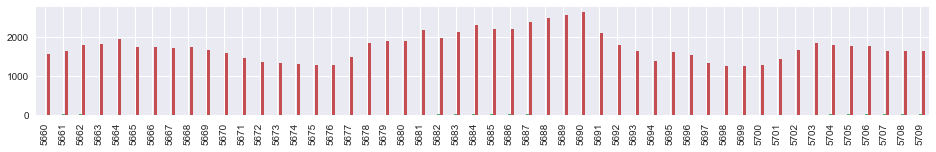

In [23]:
dfM.iloc[5660:5710, :].plot(kind='bar',figsize=(16,2), legend=False)

### <span style="color:blue">Influence plot</span>

Wykres wpływu pokazuje wartości rezydualne modelu w funkcji dźwigni każdej obserwacji zmierzonej za pomocą macierzy hat matrix. Zewnętrznie wyuczone wartości rezydualne są skalowane zgodnie z ich standardowym odchyleniem
Dostępne są dwie miary wpływu: Cook i DFFITS.

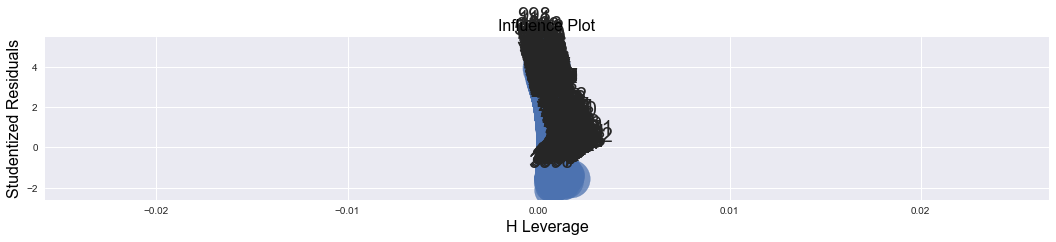

In [24]:
fig, ax = plt.subplots(figsize=(18,3))
fig = sm.graphics.influence_plot(model_fit, ax=ax, criterion="cooks")


Interpretacja

Wielkość baniek (na naszym wykresie tego nie widać) oznacza wielkość odległości cooka, czym większa bańka tym większy parametr cooka.

#### DFFITS
DFFITS to diagnostyka, która ma pokazać, jak duży wpływ ma punkt w regresji statystycznej zaproponowanej w 1980 r. [1] Jest on zdefiniowany jako studencki DFFIT, gdzie ten ostatni jest zmianą przewidywanej wartości dla punktu, uzyskaną, gdy ten punkt jest pozostawiony poza regresją.

#### Cooks
jest powszechnie stosowanym oszacowanie wpływu punktu danych podczas wykonywania najmniejszych kwadratów analizy regresji . [1] W praktycznej zwykłej analizie metodą najmniejszych kwadratów odległość Cooka można wykorzystać na kilka sposobów: 
- w celu wskazania wpływowych punktów danych, które są szczególnie warte sprawdzenia pod kątem ważności; lub 
- wskazać obszary przestrzeni projektowej, w których dobrze byłoby uzyskać więcej punktów danych. 

Oznacza to, że odległość Cooks mierzy wpływ każdej obserwacji w modelu lub „co by się stało, gdyby każdej obserwacji nie było w modelu”, i jest to ważne, ponieważ jest to jeden ze sposobów wykrywania wartości odstających, który wpływa szczególnie na linię regresji. Gdy nie szukamy i nie traktujemy potencjalnych wartości odstających w naszych danych, możliwe, że skorygowane współczynniki dla modelu mogą nie być najbardziej reprezentatywne lub odpowiednie, co może prowadzić do nieprawidłowego wnioskowania.

#### The hat values
Wartości hat są wartościami dopasowanymi lub przewidywaniami dokonanymi przez model dla każdej obserwacji. Zupełnie różni się od odległości Cooka.

#### H levarage
H levarage mierzy, jak każdy parametr wejściowy X wpływa na model dopasowania. Natomiast odległość Cooka obejmuje również wpływ parametru wyjściowego y.